In [12]:
import warnings
warnings.filterwarnings("ignore")
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
import matplotlib.colors as col

##Iris Dataset

Iris dataset consists of 150 samples of iris flowers, each described by four features: sepal length, sepal width, petal length, and petal width.

The dataset is divided into three classes: Iris-setosa, Iris-versicolor, and Iris-virginica, each with 50 samples.

In [6]:
# Load the iris dataset
iris = load_iris()
data_x = pd.DataFrame(iris.data, columns=iris.feature_names)
data_y = pd.DataFrame(iris.target, columns=["Species"])

# Concatenate the feature and target dataframes along the columns (axis=1)
data = pd.concat([data_x, data_y], axis=1)

# Display the information of the concatenated dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
# Split the dataset into trainset:testset = 0.8:0.2
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [8]:
# Define a desicion tree with depth equal to 2
classification_tree_iris = DecisionTreeClassifier(max_depth=2, random_state=0)
# Fit the tree with traing data
classification_tree_iris.fit(x_train, y_train)
# Evaluate the trainig accuracy
classification_tree_iris.score(x_train, y_train)

0.95

##Visualize the tree we build

In [9]:
text_representation = export_text(classification_tree_iris)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- class: 2



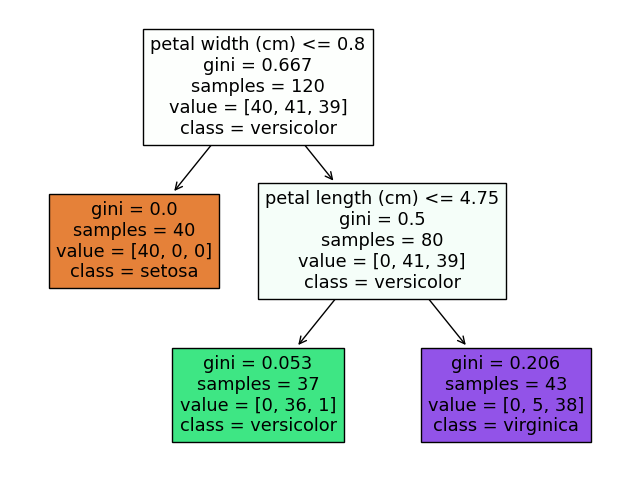

In [10]:
fig = plt.figure(figsize=(8,6))
_ = plot_tree(classification_tree_iris,
                   feature_names=x_train.columns,
                   class_names=iris.target_names,
                   filled=True)

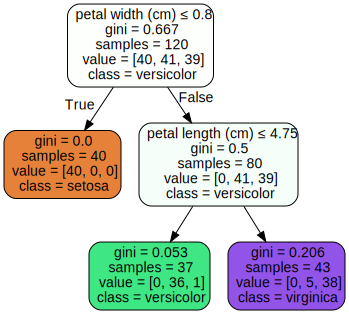

In [11]:
#Graphviz Visualization
dot_graph = export_graphviz(classification_tree_iris,
                out_file=None,
                feature_names=x_train.columns,
                class_names=iris.target_names,
                filled=True, rounded=True,
                special_characters=True
                )

tree_graph = graphviz.Source(dot_graph, format="png")
tree_graph

##Decision Boundary

In [22]:
# Define Decision Boundary Function
def plot_decision_boundary(x, y, model):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k',cmap=cmap_bold)

Accuracy: 0.7733


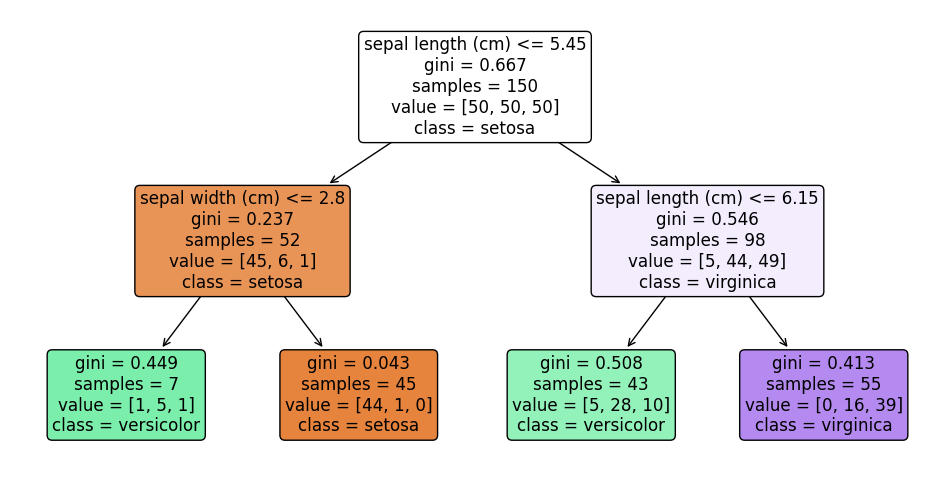

In [27]:
# Fit a desicision tree with only sepal length and width, and limit the depth of tree equal to 2
classification_tree_iris_2var = DecisionTreeClassifier(max_depth=2)
classification_tree_iris_2var.fit(iris.data[:,:2], iris.target)
# Plot the tree
fig = plt.figure(figsize=(12,6))
plot_tree(classification_tree_iris_2var, feature_names=iris.feature_names[:2], class_names=iris.target_names, filled=True, rounded=True)
# Print the classification accuracy
print('Accuracy:', accuracy_score(iris.target, classification_tree_iris_2var.predict(iris.data[:,:2])).round(4))
plt.show()

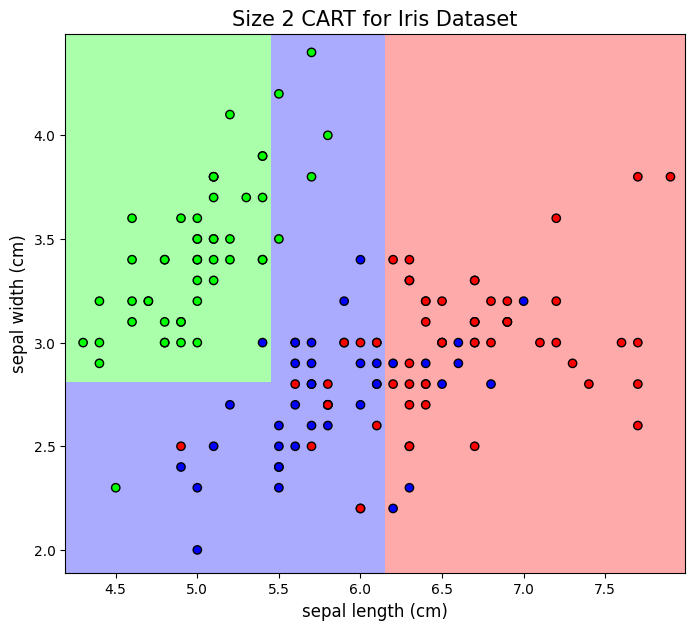

In [28]:
# Plot decision boundary
plot_decision_boundary(iris.data[:,:2],iris.target, classification_tree_iris_2var)
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)
plt.title('Size 2 CART for Iris Dataset', fontsize = 15)
plt.show()

Accuracy: 0.9267


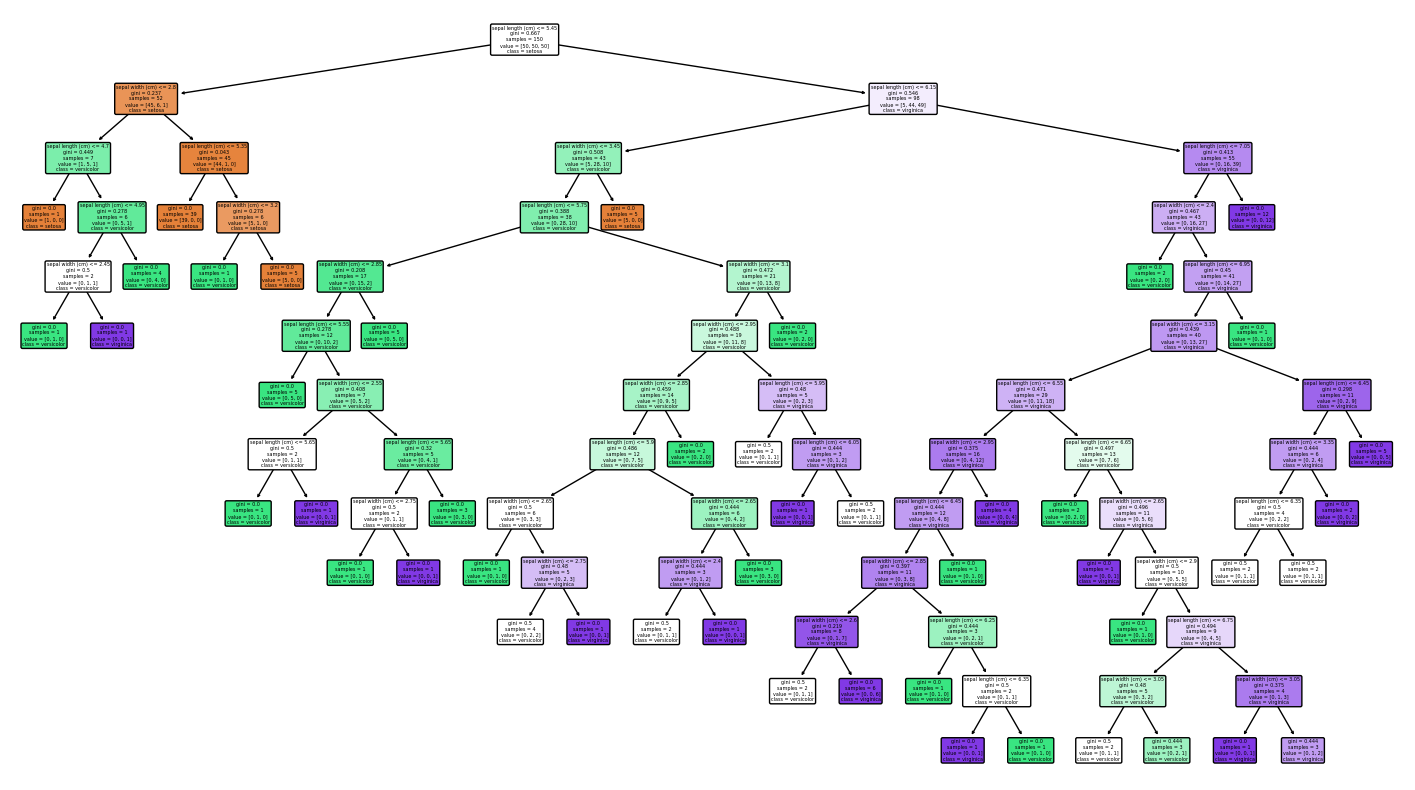

In [29]:
# Fit classification tree with maximum depth
fig = plt.figure(figsize=(18,10))
classification_tree_iris_2var_max = DecisionTreeClassifier()
classification_tree_iris_2var_max.fit(iris.data[:,:2], iris.target)
plot_tree(classification_tree_iris_2var_max, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, ax=plt.gca())
print('Accuracy:', accuracy_score(iris.target, classification_tree_iris_2var_max.predict(iris.data[:,:2])).round(4))
plt.show()

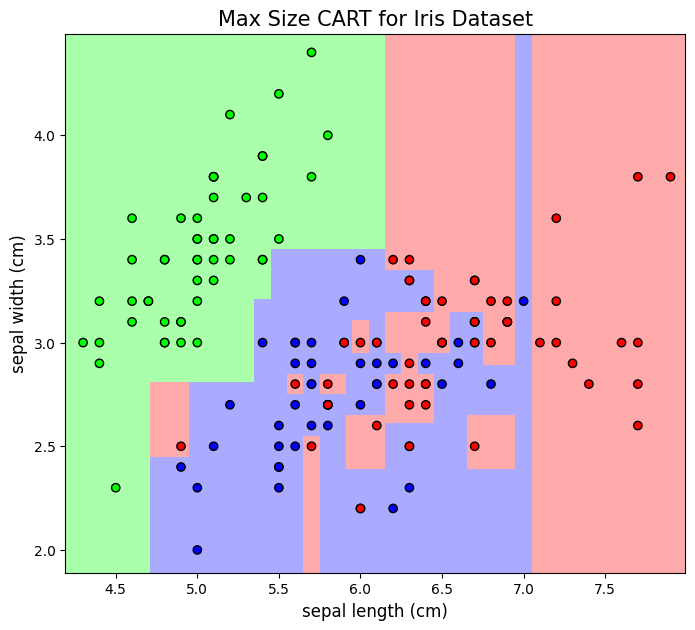

In [30]:
plot_decision_boundary(iris.data[:,:2],iris.target, classification_tree_iris_2var_max)
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)
plt.title('Max Size CART for Iris Dataset', fontsize = 15)
plt.show()

##Titanic Dataset

The Titanic dataset consists of 1309 records of passengers, each described by various features.

This dataset is commonly used for classification tasks, particularly to predict whether a passenger survived the Titanic disaster based on the provided features.


In [32]:
dfcombine = pd.read_csv('./titaniccombine.csv')
dfcombine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,newSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [33]:
dfcombine['Embarked'] = dfcombine['Embarked'].replace({'S': 0,'C': 1,'Q': 2})
dfcombine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,newSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,2.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1.0,0


In [34]:
dfcombine[['Age','Fare','Embarked']] = dfcombine[['Age','Fare','Embarked']].fillna(dfcombine[['Age','Fare','Embarked']].median())
dfcombine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,newSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,2.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,0.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,0.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1.0,0


##Single Decision Tree

In [35]:
X = pd.DataFrame(dfcombine, columns=['Age', 'Pclass', 'newSex', 'Embarked', 'Fare'])
y = pd.DataFrame(dfcombine, columns=['Survived'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [39]:
cls_tree_titanic = DecisionTreeClassifier(max_depth=4, random_state=40)
cls_tree_titanic.fit(X_train, y_train)
print(cls_tree_titanic.score(X_test, y_test))

0.7977099236641222


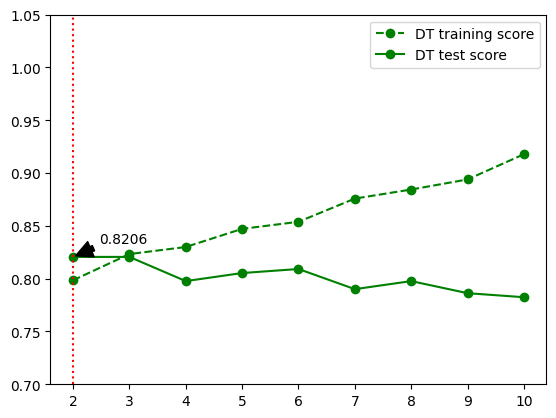

In [41]:
train_single_scores = []
test_single_scores = []
for depth in range(2, 11):
    cls_tree_titanic = DecisionTreeClassifier(max_depth=depth, random_state=40)
    cls_tree_titanic.fit(X_train, y_train)
    train_single_scores.append(cls_tree_titanic.score(X_train, y_train))
    test_single_scores.append(cls_tree_titanic.score(X_test, y_test))

plt.plot(train_single_scores, "go--")
plt.plot(test_single_scores, "go-")
plt.ylim(0.7, 1.05)
plt.xticks(range(9), range(2, 11))
plt.legend(["DT training score", "DT test score"])
plt.axvline(np.argmax(test_single_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_single_scores).round(4), (np.argmax(test_single_scores), np.max(test_single_scores)), xycoords="data",
                 xytext=(50, 25), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

##Random Forest

It provides a way of averaging multiple decision trees, trained on different variables of the same training set.

It also suffers from the loss of interpretability, and therefore variable importance is proposed to interpret the fitted model.

Procedure for fitting a random forest:

1.   Perform Bagging sampling, and for each bagging set, randomly select m variables out of p variables (m < p);
2.   Fit a basic learner (decision tree) for different bagging sets;
3.   Repeat the above steps and obtain a set of trees (e.g., 100);
4.   The prediction can be calculated via the simple average of different trees.

In [42]:
#Train the random forest model
from sklearn.ensemble import RandomForestClassifier
rf_titanic = RandomForestClassifier(n_estimators=100, max_depth=depth, max_features=4, random_state=40)
rf_titanic.fit(X_train, y_train.values.ravel())
print(rf_titanic.score(X_test, y_test))

0.8206106870229007


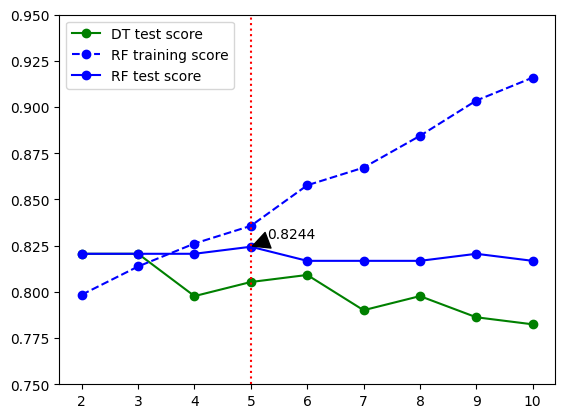

In [43]:
# Compare the performance between Single Tree and Random Forest
from sklearn.ensemble import RandomForestClassifier
train_rf_scores = []
test_rf_scores = []
for depth in range(2, 11):
    rf_titanic = RandomForestClassifier(n_estimators=100, max_depth=depth, max_features=3, random_state=40)
    rf_titanic.fit(X_train, y_train.values.ravel())
    train_rf_scores.append(rf_titanic.score(X_train, y_train))
    test_rf_scores.append(rf_titanic.score(X_test, y_test))

plt.plot(test_single_scores, 'go-')
plt.plot(train_rf_scores, 'bo--')
plt.plot(test_rf_scores, 'bo-')
plt.ylim(0.75, 0.95)
plt.xticks(range(9), range(2, 11))
plt.legend(["DT test score", "RF training score", "RF test score"])
plt.axvline(np.argmax(test_rf_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_rf_scores).round(4), (np.argmax(test_rf_scores), np.max(test_rf_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

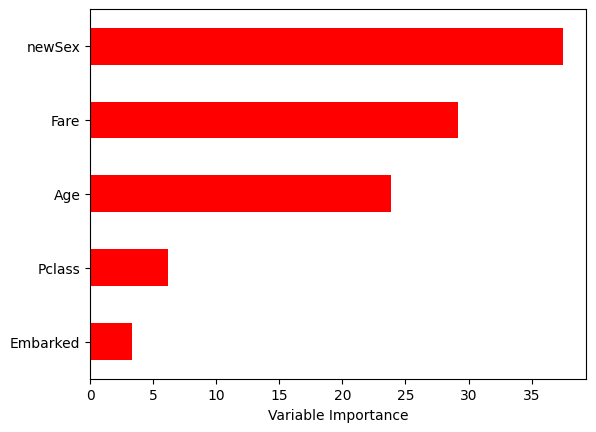

In [44]:
# Feature Importance
importance = pd.DataFrame({'Importance':rf_titanic.feature_importances_*100}, index=X_train.columns)
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

##AdaBoost

AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

- Weighting: At each iteration of the training process, a weight is assigned to each sample according to the error;
- Training: At each iteration, a weak learner is trained on the reweighted sample;
- Combination: Build a strong classifier as the weighted linear combination of the weak classifiers (based on their accuracy).
- For simplicity, we restrict our attention on the binary classification problem with $y\in\{-1,1\}$ and classifiers $G_m\in\{-1,1\}$.
- In Adaboost, the exponential loss is applied $L(y,f(\mathbf{x}))=\exp(-y f(\mathbf{x}))$ and the fitting process can be rewritten as
$$
\begin{align*}
(\hat{\beta}_m,\hat{G}_m)
&=\arg\min_{\beta_m, G_m}\sum_{i=1}^n \exp\left[-y_i(f_{m-1}(\mathbf{x}_i)+\beta_mG_m(\mathbf{x}_i))\right]\\
&=\arg\min_{\beta_m, G_m}\sum_{i=1}^n w_i^{(m)}\exp\left[-y_i\beta_mG_m(\mathbf{x}_i))\right],~\mbox{for}~m=1,\dots,M,
\end{align*}
$$
where $w_i^{(m)}=\exp(-y_if_{m-1}(\mathbf{x}_i))$ is the $i$th sample weight that measures its 'error'.
- Given above formula, we can intuitively describe the Adaboost algorithm as follows:
    - Initialize the equal sample weights;
    - For $m=1,\dots, M$, increase and decrease the weights for misclassified and well-classified samples accordingly, and fit a weaker learner $G_m$ with its additive coefficient $\beta_m$ on the weighted data.
    - Make prediction by $\mbox{sign}(\sum_{m=1}\beta_mG_m(\mathbf{x}))$.
- There are many options of loss functions for classification, such as binomial deviance, hinge loss, squared-error loss, while for the regression problem, the loss function is typically chosen as squared-error loss or absolute-error loss.
- The weak learner in AdaBoost is not restricted in decision tree, it can also be, for example, the shallow and small neural network.
- Pros & Cons:
    - Pros: flexible, easy to implement and hard to overfit.
    - Cons: sensitive to the outliers.

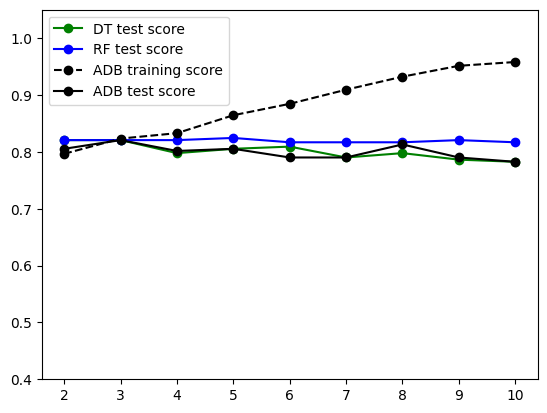

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# Train the trees in our AdaBoost algorithm
train_adb_scores = []
test_adb_scores = []
for depth in range(2, 11):
    regr_adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), n_estimators=100, learning_rate=0.001, random_state=40)
    regr_adb.fit(X_train, y_train.values.ravel())
    train_adb_scores.append(regr_adb.score(X_train, y_train))
    test_adb_scores.append(regr_adb.score(X_test, y_test))

#  Plot the performance of each method
plt.plot(test_single_scores, 'go-')
plt.plot(test_rf_scores, 'bo-')
plt.plot(train_adb_scores, 'ko--')
plt.plot(test_adb_scores, 'ko-')
plt.ylim(0.4, 1.05)
plt.xticks(range(9), range(2, 11))
plt.legend(["DT test score", "RF test score", "ADB training score", "ADB test score"])
plt.show()